# Harmonic oscillator in 2d

In [6]:
import numpy as np
from fft_tdse.simulator import *
from fft_tdse.animator import *
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from colorcet import cm

In [7]:
x_min = -10.0
x_max = 10.0
nx = 512


def potential(x, y):
    V = x*x/2 + y*y/2
    V_cut = 20
    return V_cut * (V > V_cut) + V * (V < V_cut)



In [8]:
# recurrence relation for Hermite functions
def hermite(n, x):
    g = np.exp(-x**2 / 2.0)
    if n == 0:
        return np.ones_like(x) * np.pi ** (-0.25) * g
    elif n == 1:
        return 2 * (2.0 * np.pi**.5) ** (-.5) * x * g
    else:
        return (2.0/n)**.5 * x * hermite(n-1, x) - ((n-1.0)/n)**.5 * hermite(n-2, x)
    


hermite2d = lambda nx, ny, x, y: hermite(nx, x) * hermite(ny, y)



ic| message: 'Dimension set to 2'
ic| 'Time grid:'
ic| self.t0: 0.0, self.t1: 12.566370614359172, self.n_steps: 6031
ic| message: 'Initial condition set.'
ic| self.initial_psi_fun: <function <lambda> at 0x173e9add0>
ic| hasattr(self, 'gs'): False
ic| self.name: 'ho_2d_1_0'
ic| self.folder: './ho_2d_1_0_frames/'
ic| self.fig_width_pixels: 800
    self.fig_height_pixels: 600
    self.fig_width: 10
    self.fig_height: 7.5
    self.dpi: 80.0
ic| self.format: './ho_2d_1_0_frames/frame%06d.png'
ic| self.fig_width_pixels: 1080
    self.fig_height_pixels: 1080
    self.fig_width: 10
    self.fig_height: 10.0
    self.dpi: 108.0
ic| 'inside mpl_style'
ic| animator.py:673 in get_extent() at 22:35:07.735
ic| x_range.shape: (512,), y_range.shape: (512,)
ic| extent: [-10.0, 9.9609375, -10.0, 9.9609375]
ic| self.caption_font: <matplotlib.font_manager.FontProperties object at 0x111c3e0e0>
ic| animator.py:673 in get_extent() at 22:35:07.871
ic| x_range.shape: (512,), y_range.shape: (512,)
ic| extent:

  0%|          | 0/6031 [00:00<?, ?it/s]

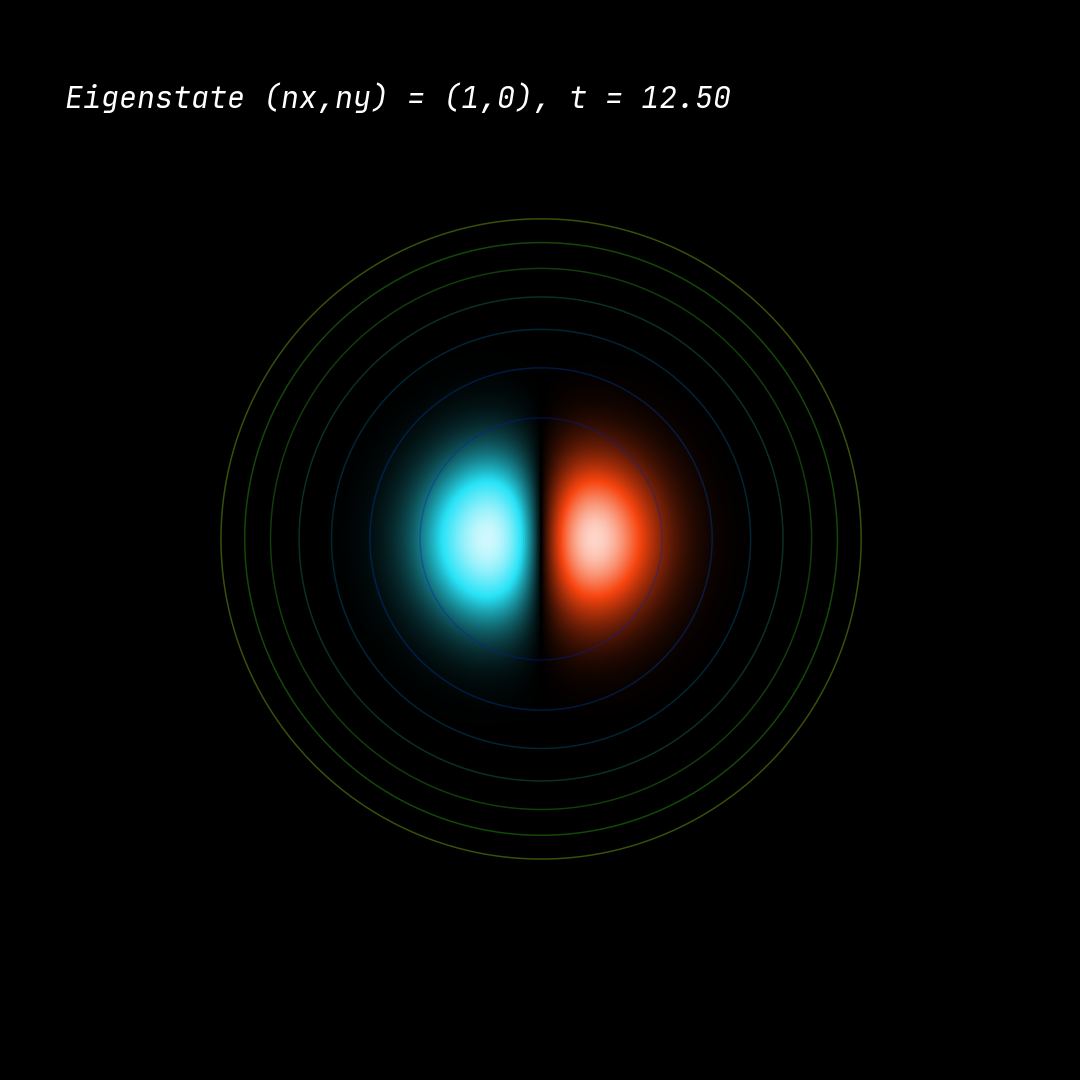

ic| len(self.frame_list): 302
ic| 'making movie ...'
ic| filename: 'ho_2d_1_0.mp4'
ffmpeg version N-111795-g95433eb3aa-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-lib

In [9]:
state_nx, state_ny = 1, 0
name = f'ho_2d_{state_nx}_{state_ny}'

t_final = 4*np.pi 
skip = 20
secs_per_unit = 1.0
n_steps = int(24 * skip * secs_per_unit * t_final)


sim = Simulator(verbose=True)
sim.set_dimension(2)
sim.set_potential(potential)
sim.set_grid([x_min, x_min], [x_max, x_max], [nx, nx])
sim.set_time_parameters(0.0, t_final, n_steps)
sim.set_initial_condition(lambda x, y: hermite2d(state_nx, state_ny, x, y))



sim.prepare()

anim = Animator2d(sim, name)
anim.set_style(DarkTheme())
anim.set_interval(skip)
anim.set_framesize(1080, 1080)
anim.caption_format = f'Eigenstate (nx,ny) = ({state_nx},{state_ny}), t = {{sim.t:.2f}}'
anim.show_axis = False
anim.phase_cmap = cm['CET_C6']
anim.init_figure()
anim.add_potential_visualization_2d(contour=True)
anim.set_preview(True,10)
anim_callback = anim.get_callback()

def callback(sim):
    anim_callback(sim)
    
sim.simulate(callback=callback)
anim.make_movie(f"ho_2d_{state_nx}_{state_ny}.mp4")
anim.clean_frames()
